# Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Setting up visualizations
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# Load datasets
anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

In [3]:
print(anime.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [4]:
print(ratings.head())

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1


In [5]:
# Check for missing values in anime dataset
print(anime.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [6]:
# Fill missing values
anime['genre'] = anime['genre'].fillna('Unknown')
anime['type'] = anime['type'].fillna(anime['type'].mode()[0])
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())

In [7]:
# Check for missing values in ratings dataset
print(ratings.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [8]:
# Convert relevant columns to appropriate data types
anime['genre'] = anime['genre'].astype('str')
anime['type'] = anime['type'].astype('category')
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')
ratings['rating'] = ratings['rating'].astype('float')

In [9]:
print(anime.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3                                   Sci-Fi, Thriller     TV      24.0    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [10]:
print(ratings.head())

   user_id  anime_id  rating
0        1        20    -1.0
1        1        24    -1.0
2        1        79    -1.0
3        1       226    -1.0
4        1       241    -1.0


In [11]:
# Remove entries where rating is -1.0
ratings_filtered = ratings[ratings['rating'] != -1.0]

In [12]:
# Check the shape of the filtered dataset to confirm the removal
print(ratings_filtered.shape)

(6337241, 3)


In [13]:
# Display the first few rows of the filtered dataset
print(ratings_filtered.head())

     user_id  anime_id  rating
47         1      8074    10.0
81         1     11617    10.0
83         1     11757    10.0
101        1     15451    10.0
153        2     11771    10.0


In [14]:
# Top 10 anime by rating
top_10_anime = anime.sort_values(by='rating', ascending=False).head(10)
print(top_10_anime[['name', 'rating']])

                                          name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33
1             Fullmetal Alchemist: Brotherhood    9.26
2                                     Gintama°    9.25
10786          Yakusoku: Africa Mizu to Midori    9.25
3                                  Steins;Gate    9.17
4                                Gintama&#039;    9.16


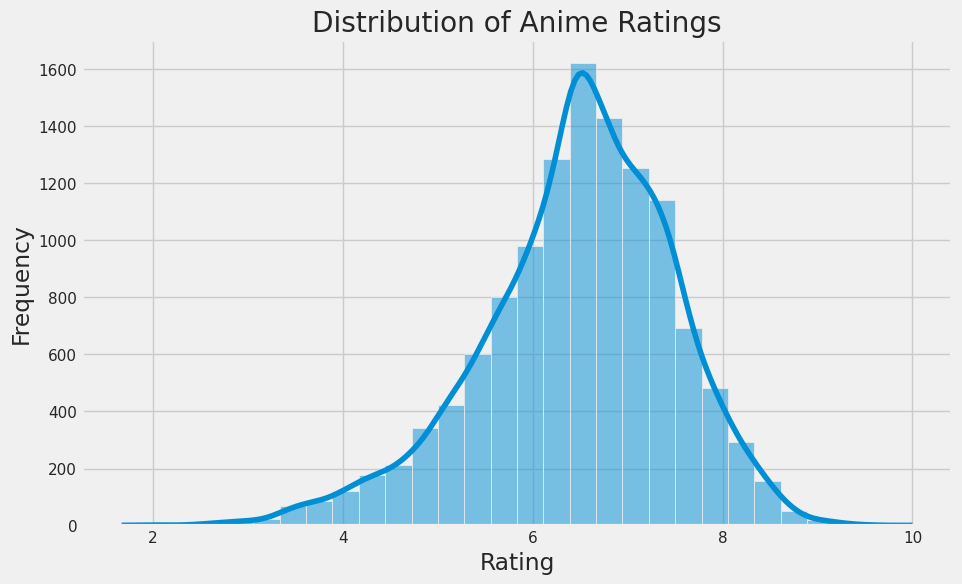

In [15]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

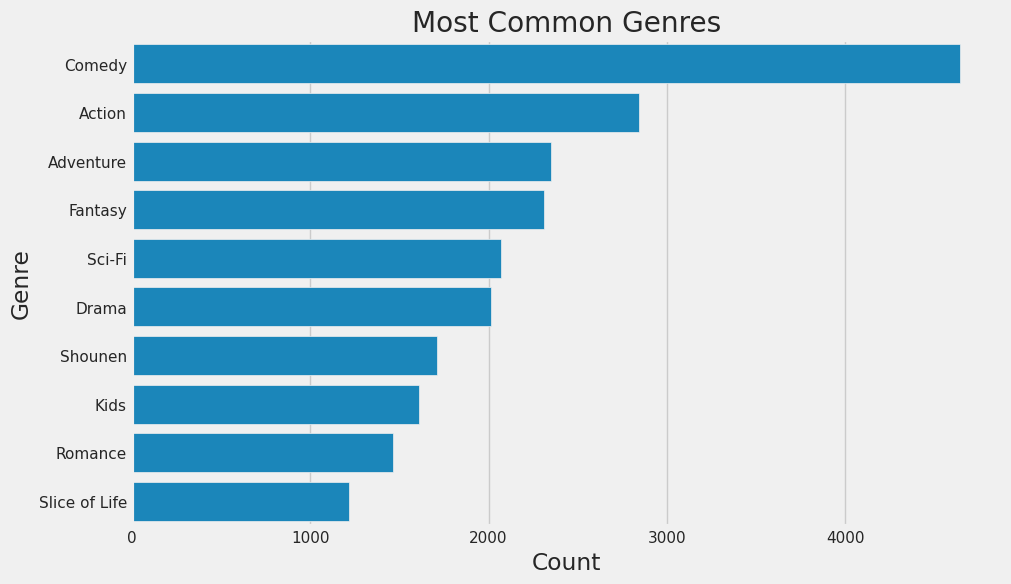

In [16]:
# Most common genres
anime['genre_list'] = anime['genre'].apply(lambda x: x.split(', '))
genres = anime['genre_list'].explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index)
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [17]:
# Group by 'genre' and get the top-rated anime within each genre
top_rated_by_genre = anime.sort_values(by='rating', ascending=False).groupby('genre').head(1)

# Print the top-rated anime by genre
print(top_rated_by_genre[['name', 'genre', 'rating']])

                                          name  \
10464  Taka no Tsume 8: Yoshida-kun no X-Files   
10400              Spoon-hime no Swing Kitchen   
9595                          Mogura no Motoro   
0                               Kimi no Na wa.   
9078                              Kahei no Umi   
...                                        ...   
8049                Soujuu Senshi Psychic Wars   
10062                              Rescue YoYo   
9684                       Narara Wondeogongju   
10290                        Shuugou no Kangae   
9516          Mechano: Scientific Attack Force   

                                                  genre  rating  
10464                                    Comedy, Parody   10.00  
10400                                   Adventure, Kids    9.60  
9595                                      Slice of Life    9.50  
0                  Drama, Romance, School, Supernatural    9.37  
9078                                         Historical    9.33  
...

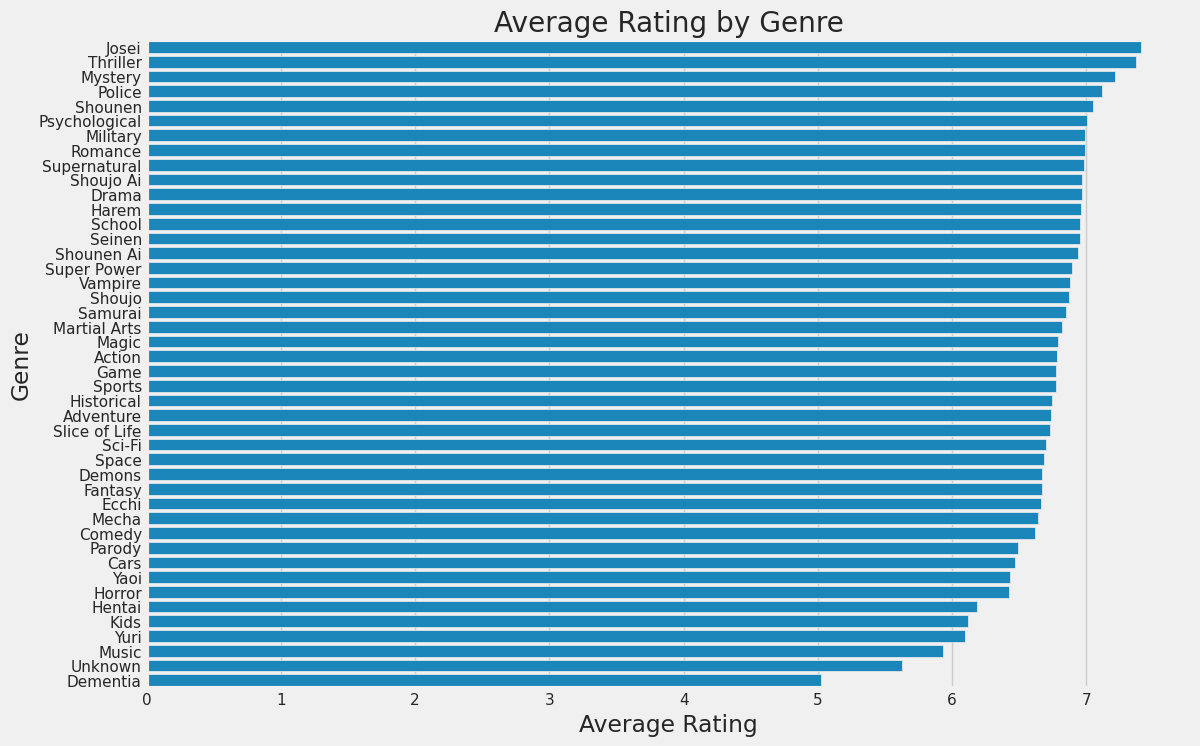

In [18]:
# Average rating by genre
avg_rating_by_genre = anime.explode('genre_list').groupby('genre_list')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_genre.values, y=avg_rating_by_genre.index)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

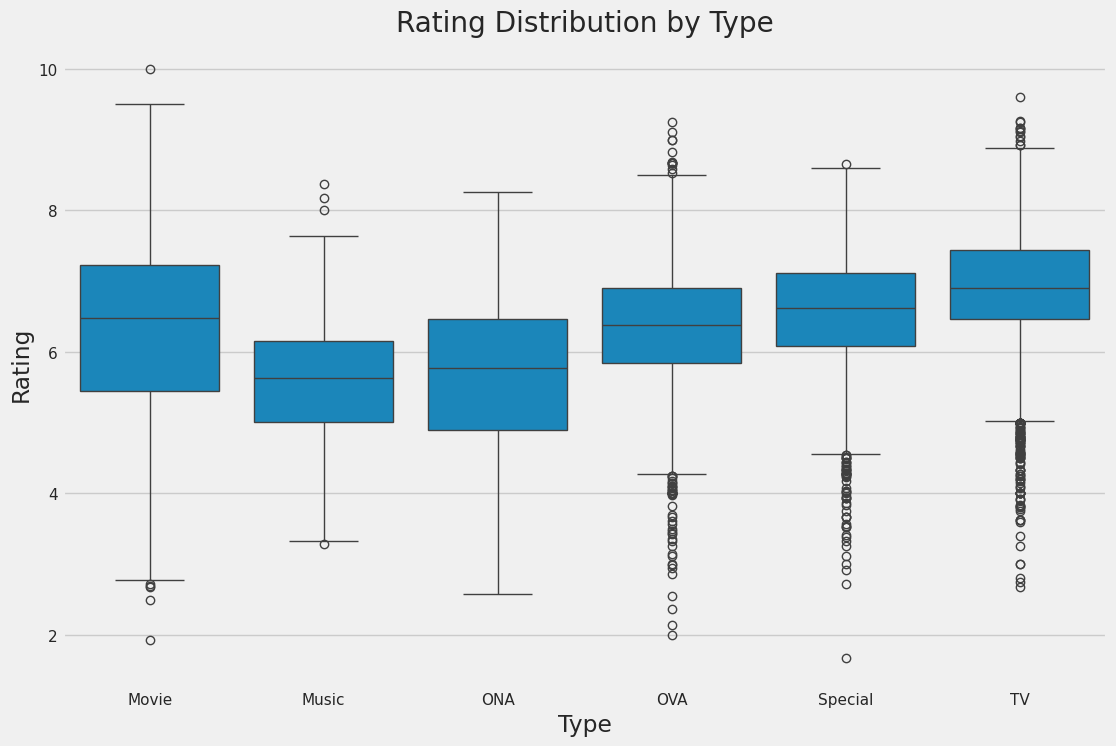

In [19]:
# Rating distribution by type
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='rating', data=anime)
plt.title('Rating Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

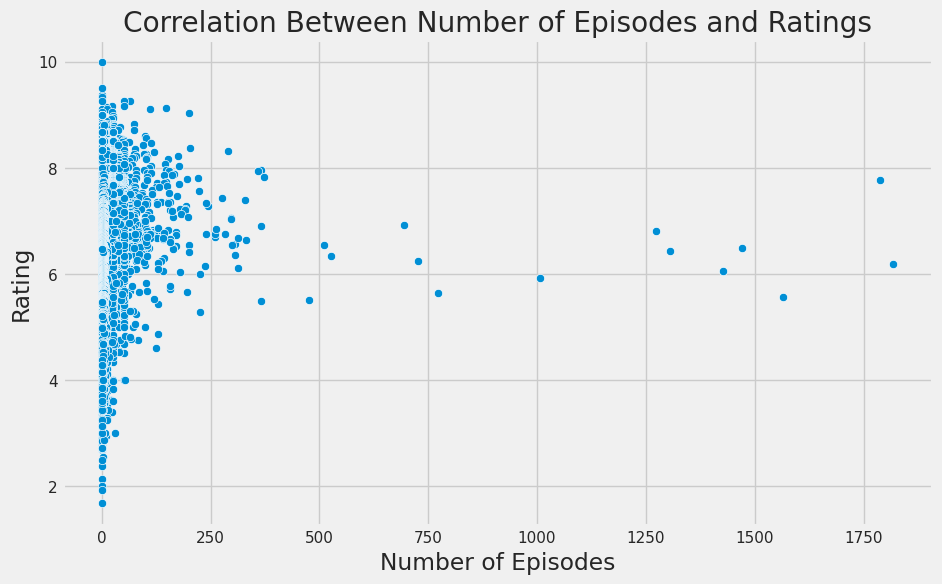

In [20]:
# Correlation between number of episodes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='episodes', y='rating', data=anime)
plt.title('Correlation Between Number of Episodes and Ratings')
plt.xlabel('Number of Episodes')
plt.ylabel('Rating')
plt.show()

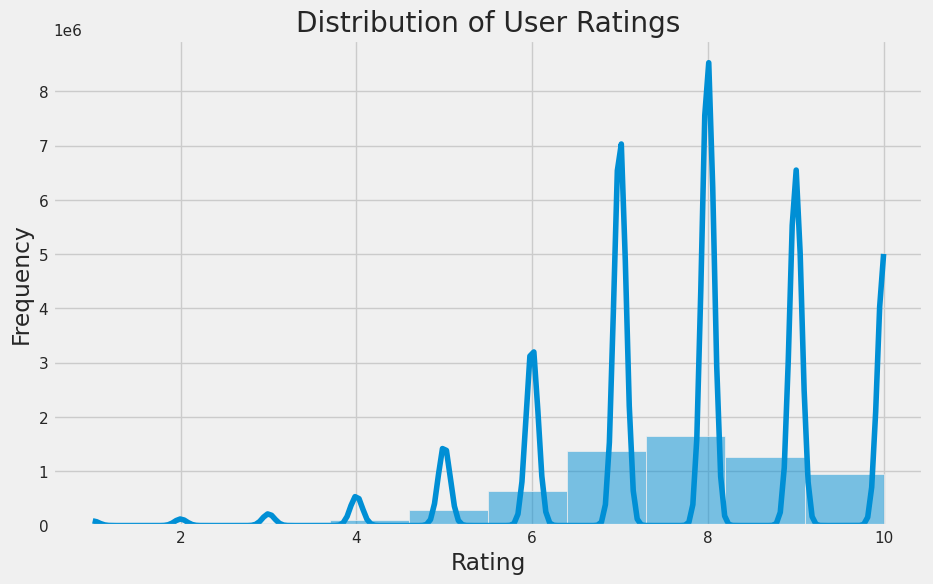

In [21]:
# User rating patterns
plt.figure(figsize=(10, 6))
sns.histplot(ratings_filtered['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

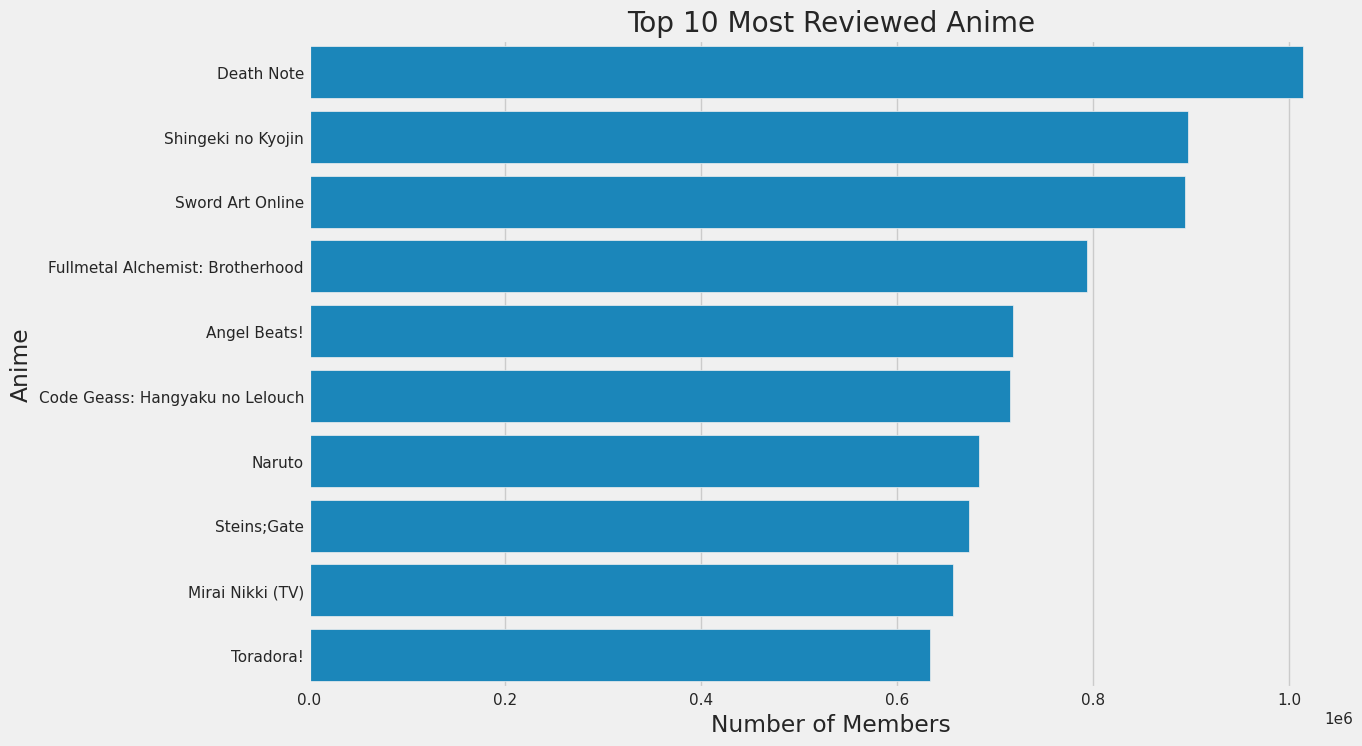

In [22]:
# Top 10 most reviewed anime
most_reviewed_anime = anime.sort_values(by='members', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=most_reviewed_anime['members'], y=most_reviewed_anime['name'])
plt.title('Top 10 Most Reviewed Anime')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()

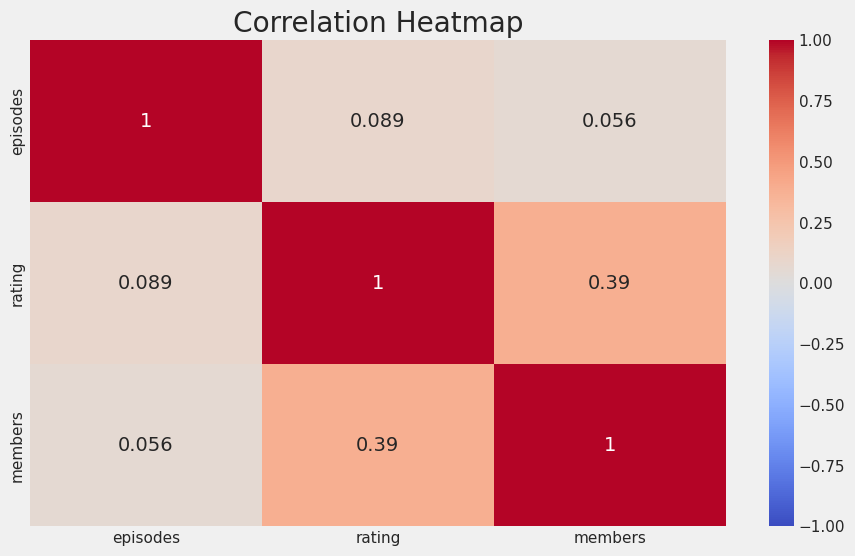

In [23]:
# Heatmap of rating correlations
corr_matrix = anime[['episodes', 'rating', 'members']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

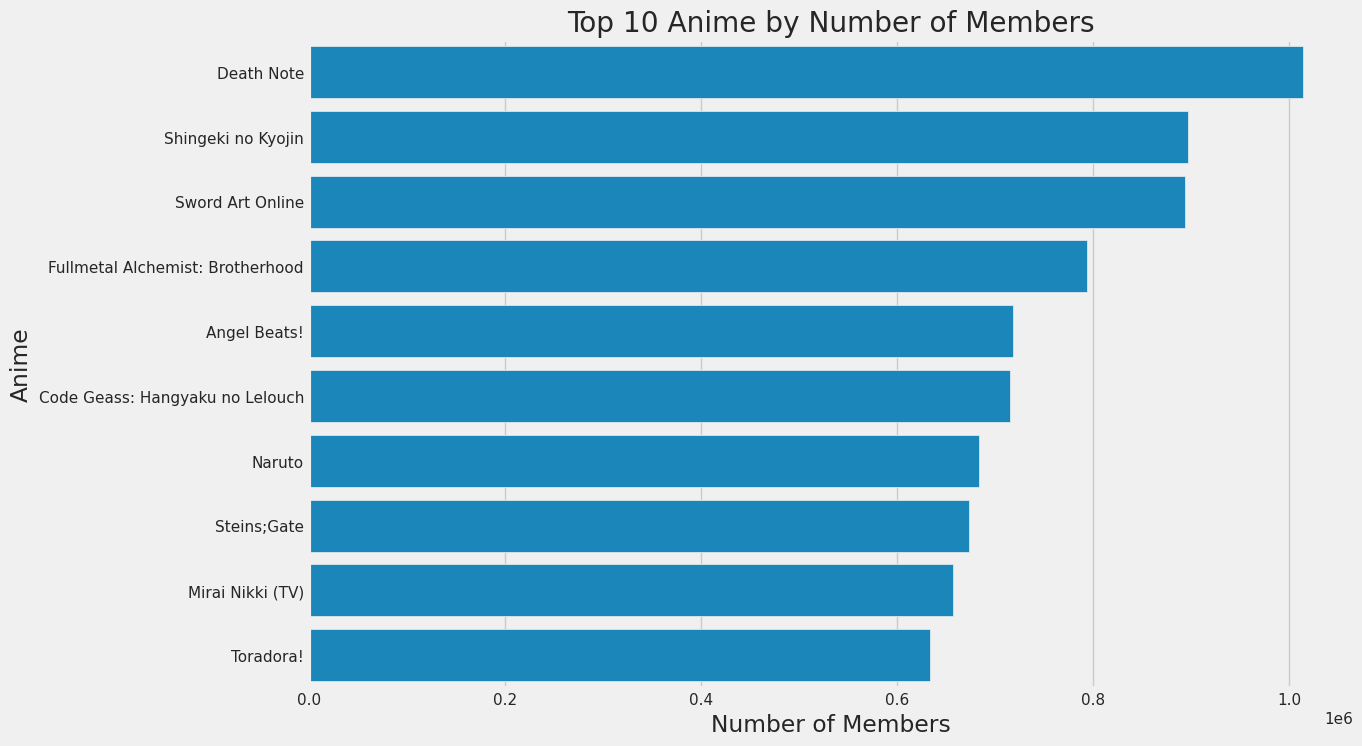

In [24]:
# Top 10 anime by number of members
top_10_members = anime.sort_values(by='members', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_members['members'], y=top_10_members['name'])
plt.title('Top 10 Anime by Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()

In [25]:
# Save the cleaned anime dataset
anime.to_csv('cleaned_anime.csv', index=False)

# Save the filtered ratings dataset
ratings_filtered.to_csv('cleaned_ratings.csv', index=False)

# Building the Recommendation System

In [26]:
# Recommendation System
# Create a count matrix for the 'genre' column
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), token_pattern=None)
genre_matrix = count_vectorizer.fit_transform(anime['genre'])

# Compute the cosine similarity based on the count matrix
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = anime[anime['name'] == title].index[0]

    # Get the pairwise similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    return anime[['name', 'genre']].iloc[anime_indices]

# Test the recommendation function
print(get_recommendations('Kimi no Na wa.'))

                                                   name  \
5805                        Wind: A Breath of Heart OVA   
6394                       Wind: A Breath of Heart (TV)   
1111              Aura: Maryuuin Kouga Saigo no Tatakai   
208                       Kokoro ga Sakebitagatterunda.   
504   Clannad: After Story - Mou Hitotsu no Sekai, K...   
1201                     Angel Beats!: Another Epilogue   
1435                                         True Tears   
1436                 &quot;Bungaku Shoujo&quot; Memoire   
1494                                           Harmonie   
1631                                Kimikiss Pure Rouge   

                                             genre  
5805          Drama, Romance, School, Supernatural  
6394          Drama, Romance, School, Supernatural  
1111  Comedy, Drama, Romance, School, Supernatural  
208                         Drama, Romance, School  
504                         Drama, Romance, School  
1201                   Drama, Sc